# Извлечение данных

На этом занятии мы расследуем загадочное убийство с помощью SQL-запросов!

In [1]:
!git clone https://github.com/NUKnightLab/sql-mysteries.git

fatal: целевой путь «sql-mysteries» уже существует и не является пустым каталогом.


[Задание](sql-mysteries/prompt_beginner.pdf)

Схема базы данных:

<img src = "sql-mysteries/schema.png"/>

## Подключение и работа с базой данных на примере SQLite

In [2]:
import sqlite3
import pandas as pd

In [3]:
connection = sqlite3.connect('sql-mysteries/sql-murder-mystery.db')

In [4]:
with connection:
    message_list = connection.execute(
        """
        SELECT * FROM crime_scene_report
        ;
        """
    )

In [5]:
for n, item in enumerate(message_list):
    print(item)
    if n > 5:
        break

(20180115, 'robbery', 'A Man Dressed as Spider-Man Is on a Robbery Spree', 'NYC')
(20180115, 'murder', 'Life? Dont talk to me about life.', 'Albany')
(20180115, 'murder', 'Mama, I killed a man, put a gun against his head...', 'Reno')
(20180215, 'murder', 'REDACTED REDACTED REDACTED', 'SQL City')
(20180215, 'murder', 'Someone killed the guard! He took an arrow to the knee!', 'SQL City')
(20180115, 'theft', 'Big Bully stole my lunch money!', 'Chicago')
(20180115, 'fraud', 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do\n            eiusmod tempor incididunt ut labore et dolore magna aliqua.', 'Seattle')


Для подключения к другим серверам можно воспользоваться модулем sqlalchemy:

In [6]:
# from sqlalchemy import create_engine
# connection = create_engine("postgresql:///?User=username&;Password=password&Database=database_name&Server=127.0.0.1&Port=5432")

### Работа с подключением через Pandas

In [7]:
pd.read_sql(
        """
        SELECT * FROM crime_scene_report
        ;
        """,
        connection)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,be NO mistake about it: it was neither more no...,Trenton


### Условия и сортировка в запросе SELECT

In [8]:
df = pd.read_sql(
        """
        SELECT * FROM crime_scene_report
        WHERE type = "murder"
        AND date = 20180115
        AND city = "SQL City"
        ;
        """,
        connection)

In [9]:
df

,date,type,description,city
0,20180115,murder,Security footage shows that there were 2 witne...,SQL City


In [10]:
df['description'].loc[0]

'Security footage shows that there were 2 witnesses. The first witness lives at the last house on "Northwestern Dr". The second witness, named Annabel, lives somewhere on "Franklin Ave".'

In [11]:
df = pd.read_sql(
        """
        SELECT * FROM person
        ;
        """,
        connection)

In [12]:
df.head()

,id,name,license_id,address_number,address_street_name,ssn
0,10000,Christoper Peteuil,993845,624,Bankhall Ave,747714076
1,10007,Kourtney Calderwood,861794,2791,Gustavus Blvd,477972044
2,10010,Muoi Cary,385336,741,Northwestern Dr,828638512
3,10016,Era Moselle,431897,1987,Wood Glade St,614621061
4,10025,Trena Hornby,550890,276,Daws Hill Way,223877684


In [13]:
pd.read_sql(
        """
        SELECT * FROM person
        WHERE address_street_name = "Northwestern Dr"
        ORDER BY address_number DESC
        ;
        """,
        connection).head()

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
1,17729,Lasonya Wildey,439686,3824,Northwestern Dr,917817122
2,53890,Sophie Tiberio,957671,3755,Northwestern Dr,442830147
3,73368,Torie Thalmann,773862,3697,Northwestern Dr,341559436
4,96595,Coretta Cubie,303645,3631,Northwestern Dr,378403829


#### Самостоятельная работа

Найдите второго свидетеля.

In [14]:
## Ваш код ниже:


### Объединение таблиц

In [15]:
pd.read_sql(
        """
        SELECT * FROM 
        person INNER JOIN interview ON person.id = interview.person_id
        ;
        """,
        connection).head()

,id,name,license_id,address_number,address_street_name,ssn,person_id,transcript
0,28508,Raylene Goldsby,531984,1696,S Holland St,817820356,28508,‘I deny it!’ said the March Hare.\n
1,63713,Josh Cunnane,990581,3445,Evers Way,334859137,63713,\n
2,86208,Samual Sojourner,902792,2703,S Carlinda Way,504537535,86208,"way, and the whole party swam to the shore.\n"
3,35267,Johana Lugardo,648853,830,Dulles Toll St,163403073,35267,"lessons in here? Why, there’s hardly room for ..."
4,33856,Bernie Shelmon,928638,316,Marl Pat Rd,789619111,33856,\n


In [16]:
df = pd.read_sql(
        """
        SELECT * FROM 
        person INNER JOIN interview ON person.id = interview.person_id
        WHERE id = 14887 or id = 16371
        ;
        """,
        connection)

In [17]:
df

,id,name,license_id,address_number,address_street_name,ssn,person_id,transcript
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949,14887,I heard a gunshot and then saw a man run out. ...
1,16371,Annabel Miller,490173,103,Franklin Ave,318771143,16371,"I saw the murder happen, and I recognized the ..."


In [18]:
df['transcript'].loc[0]

'I heard a gunshot and then saw a man run out. He had a "Get Fit Now Gym" bag. The membership number on the bag started with "48Z". Only gold members have those bags. The man got into a car with a plate that included "H42W".'

In [19]:
df['transcript'].loc[1]

'I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th.'

In [20]:
pd.read_sql(
        """
        SELECT * FROM
        get_fit_now_member INNER JOIN get_fit_now_check_in ON get_fit_now_member.id = get_fit_now_check_in.membership_id
        WHERE id LIKE "48Z%"
        AND check_in_date = 20180109
        ;
        """,
        connection)

,id,person_id,name,membership_start_date,membership_status,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,28819,Joe Germuska,20160305,gold,48Z7A,20180109,1600,1730
1,48Z55,67318,Jeremy Bowers,20160101,gold,48Z55,20180109,1530,1700


In [21]:
pd.read_sql(
        """
        SELECT * FROM
        get_fit_now_member INNER JOIN get_fit_now_check_in ON get_fit_now_member.id = get_fit_now_check_in.membership_id
        INNER JOIN person ON get_fit_now_member.person_id = person.id
        INNER JOIN drivers_license ON person.license_id = drivers_license.id
        WHERE get_fit_now_member.id LIKE "48Z%"
        AND check_in_date = 20180109
        ;
        """,
        connection)

,id,person_id,name,membership_start_date,membership_status,membership_id,check_in_date,check_in_time,check_out_time,license_id,...,address_street_name,ssn,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,423327,67318,Jeremy Bowers,20160101,gold,48Z55,20180109,1530,1700,423327,...,"Washington Pl, Apt 3A",871539279,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS


In [22]:
with connection:
    message_list = connection.execute(
        """
        INSERT INTO solution VALUES (1, 'Jeremy Bowers');
        """
    )   

In [23]:
pd.read_sql(
        """
        SELECT value FROM solution;
        """,
        connection)['value'][0]

"Congrats, you found the murderer! But wait, there's more... If you think you're up for a challenge, try querying the interview transcript of the murderer to find the real villain behind this crime. If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries. Use this same INSERT statement with your new suspect to check your answer."

In [24]:
df = pd.read_sql(
        """
        SELECT * FROM 
        person INNER JOIN interview ON person.id = interview.person_id
        WHERE id = 67318
        ;
        """,
        connection)

In [25]:
df['transcript'].loc[0]

'I was hired by a woman with a lot of money. I don\'t know her name but I know she\'s around 5\'5" (65") or 5\'7" (67"). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n'

In [26]:
pd.read_sql(
        """
        SELECT AVG(annual_income), MAX(annual_income) FROM 
        person
        LEFT JOIN income ON person.ssn = income.ssn
        ;
        """,
        connection)

,AVG(annual_income),MAX(annual_income)
0,53257.798776,498500


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_sql(
        """
        SELECT * FROM 
        income
        ;
        """,
        connection)

In [29]:
df.describe()

,annual_income
count,7514.000000
mean,53257.798776
std,38463.768698
min,10000.000000
25%,30500.000000
50%,50800.000000
75%,70800.000000
max,498500.000000


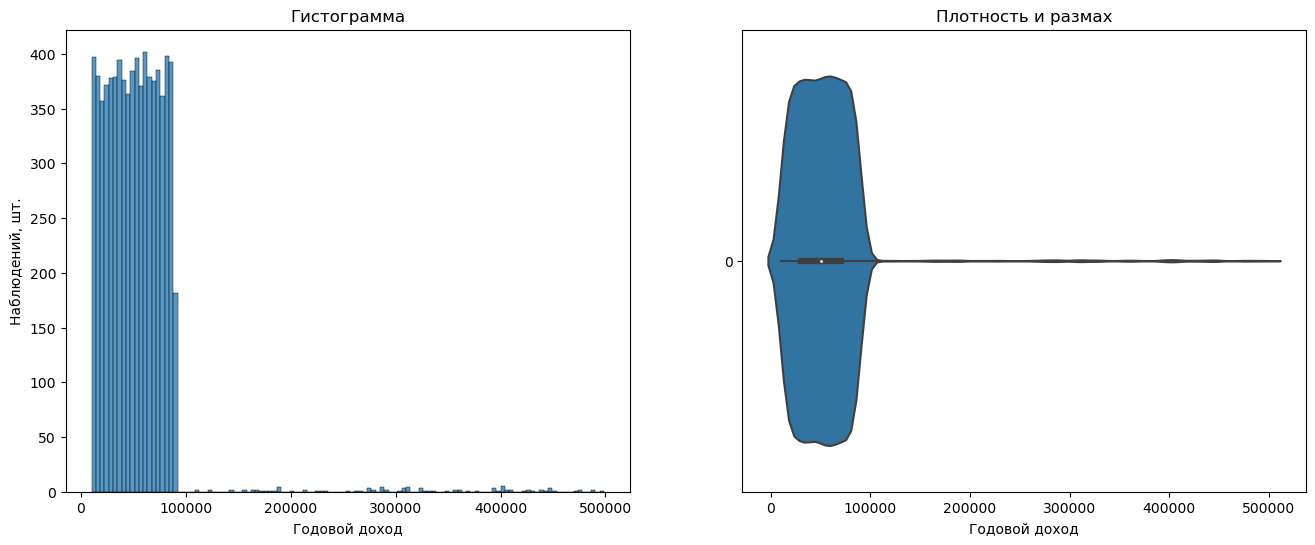

In [30]:
translations = {
    'annual_income' : 'Годовой доход',
}

def visualize(column, xlim=None):
    xlabel = translations.get(column.name, column.name)
    fig, axes = plt.subplots(1, 2, figsize=(16,6))
    sns.histplot(column, ax=axes[0], bins='fd', kde=False)
    axes[0].set(title='Гистограмма', xlabel=xlabel, ylabel='Наблюдений, шт.', xlim=xlim);
    sns.violinplot(column, ax=axes[1], orient='h')
    axes[1].set(title='Плотность и размах', xlabel=xlabel, xlim=xlim);
    
visualize(df['annual_income'])

In [32]:
pd.read_sql(
        """
        SELECT DISTINCT car_model FROM 
        drivers_license
        ;
        """,
        connection)

,car_model
0,MDX
1,SRX
2,xB
3,Rogue
4,GS
...,...
714,Silverado Hybrid
715,NV2500
716,Crosstour
717,Model X


### Группировка

In [44]:
pd.read_sql(
        """
        SELECT car_model, count(*) AS count FROM 
        drivers_license
        GROUP BY car_model
        ORDER BY count DESC
        ;
        """,
        connection)

,car_model,count
0,LS,51
1,Sierra 1500,47
2,Elantra,44
3,Corolla,43
4,Yukon,42
...,...,...
714,Aventador,1
715,9-4X,1
716,57S,1
717,500,1


In [31]:
pd.read_sql(
        """
        SELECT
        CASE
            WHEN annual_income < 30500 THEN 'Poor'
            WHEN annual_income > 30500 AND annual_income < 50800 THEN 'Average' 
            WHEN annual_income > 50800 AND annual_income < 70800 THEN 'Decent'
            WHEN annual_income > 70800 THEN 'Rich'
            ELSE 'Unknown'
        END
        as income_level, 
        count(person.id)
        FROM 
        person LEFT JOIN drivers_license on drivers_license.id = person.license_id
        LEFT JOIN income ON person.ssn = income.ssn
        GROUP BY income_level
        ;
        """,
        connection)

,income_level,count(person.id)
0,Average,1866
1,Decent,1871
2,Poor,1874
3,Rich,1875
4,Unknown,2525


In [34]:
pd.read_sql(
        """
        SELECT * FROM 
        drivers_license
        ;
        """,
        connection)['car_model'].value_counts()

car_model
LS               51
Sierra 1500      47
Elantra          44
Corolla          43
Land Cruiser     42
                 ..
Tercel            1
G-Series 1500     1
57S               1
Z4 M Roadster     1
HED-5             1
Name: count, Length: 719, dtype: int64

### Категоризация с помощью CASE

In [35]:
pd.read_sql(
        """
        SELECT * FROM facebook_event_checkin
        ;
        """,
        connection)

,person_id,event_id,event_name,date
0,28508,5880,Nudists are people who wear one-button suits.\n,20170913
1,63713,3865,but that's because it's the best book on anyth...,20171009
2,63713,3999,"If Murphy's Law can go wrong, it will.\n",20170502
3,63713,6436,Old programmers never die. They just branch t...,20170926
4,82998,4470,Help a swallow land at Capistrano.\n,20171022
...,...,...,...,...
20006,99716,1143,SQL Symphony Concert,20171206
20007,99716,1143,SQL Symphony Concert,20171212
20008,99716,1143,SQL Symphony Concert,20171229
20009,67318,4719,The Funky Grooves Tour,20180115


### Фильтрация после группировки

In [36]:
pd.read_sql(
        """
        SELECT person.id, name, COUNT(*) as count FROM 
        person LEFT JOIN facebook_event_checkin ON person.id = facebook_event_checkin.person_id
        LEFT JOIN income ON person.ssn = income.ssn
        LEFT JOIN drivers_license ON person.license_id = drivers_license.id
        WHERE event_name LIKE "SQL Symphony Concert"
        AND date LIKE "201712%"
        GROUP BY person.id, name
        HAVING count = 3
        ;
        """,
        connection)

,id,name,count
0,24556,Bryan Pardo,3
1,99716,Miranda Priestly,3


In [37]:
pd.read_sql(
        """
        SELECT * FROM 
        person
        LEFT JOIN income ON person.ssn = income.ssn
        LEFT JOIN drivers_license ON person.license_id = drivers_license.id
        WHERE person.id = 99716
        ;
        """,
        connection)

,id,name,license_id,address_number,address_street_name,ssn,annual_income,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,Miranda Priestly,202298,1883,Golden Ave,987756388,310000,68,66,green,red,female,500123,Tesla,Model S


In [38]:
with connection:
    message_list = connection.execute(
        """
        INSERT INTO solution VALUES (1, 'Miranda Priestly');
        """
    )   

In [39]:
pd.read_sql(
        """
        SELECT value FROM solution;
        """,
        connection)['value'][0]

'Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time. Time to break out the champagne!'

# Домашнее задание

## Easy

Рассмотрите таблицу `crime_scene_report` и выведите уникальные категории преступлений (столбец `type`).

In [40]:
# Ваш код ниже:


## Normal

Оцените, зависит ли средний доход человека от цвета глаз (для этого вам понадобится объединить три таблицы.)

In [41]:
# Ваш код ниже:


## Hard

Прикиньте средний доход человека в зависимости от роста. С помощью SQL-запроса выведите значения роста, при которых люди в среднем получают больше, чем те, кто на 1-3 дюйма ниже их.

In [42]:
# Ваш код ниже:
